#  Keras for Artificial Neural Networks

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [5]:
print(tf.keras.__version__)

2.6.0


## Use Keras to approximate Gaussian function $f(x) = e^{-x^2}$

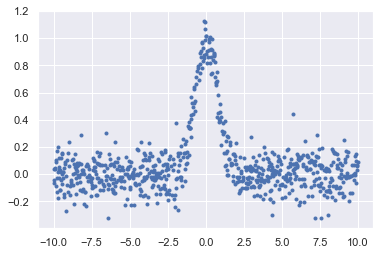

In [188]:
from sklearn.model_selection import train_test_split

n_samples = 1050 # number of samples for each dataset
test_size = 0.3   # % in test set

# define function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc = 0, scale = 0.1, size = x.shape[0] )

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)

plt.plot(X_train ,Y_train, '.')



## Building a keras network
## Model 1

- Single hidden layer, two neurons
- ``tanh`` activation, Loss func = MSE
- verbose ```0, 1, 2``` used to not display or display progress (epoch, loss etc)

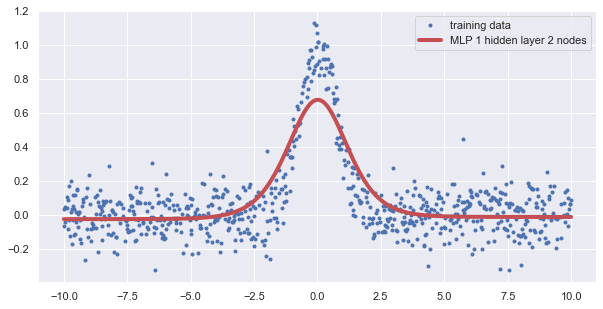

In [189]:
# number of nodes
H = 2 

# input dimension 1 since it is just x
input_dim = 1

# instantiate a sequential model
model = models.Sequential()

# add hidden layers
model.add(layers.Dense(H, input_dim = input_dim, activation = 'tanh'))

# final layer (output)
model.add(layers.Dense(1, activation = 'linear'))

# configure the model's learning process
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

# fit the model by specifying batch size and epoch
model_history = model.fit(X_train, Y_train, batch_size = 100, epochs = 100, verbose = 0)

# predict and plot results
plt.figure(figsize = (10,5))

X_range = np.linspace(-10, 10, 1000)
y_pred = model.predict(X_range)

plt.plot(X_train, Y_train, '.', label = 'training data')
plt.plot(X_range, y_pred, color = 'r', lw = 4, label = f'MLP 1 hidden layer {H} nodes')
plt.legend();

In [42]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 8}

## Model 2
- Single hidden layer, 16 neurons
- ``reLU`` activation, Loss func = MSE

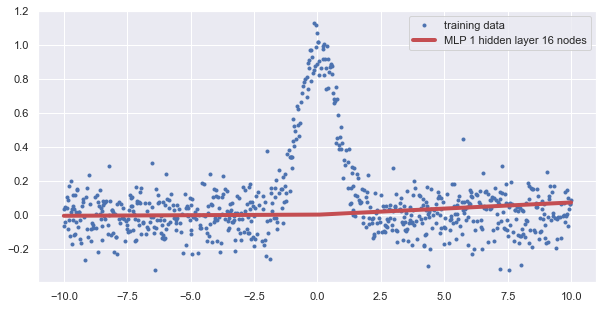

In [190]:
# number of nodes
H = 16 

# input dimension 1 since it is just x
input_dim = 1

# instantiate a sequential model
model2 = models.Sequential()

# Layer 0 -  hidden layer
model2.add(layers.Dense(H, input_dim = input_dim, kernel_initializer='normal', activation = 'relu'))

# final layer (output)
model2.add(layers.Dense(1, kernel_initializer='normal', activation = 'linear'))

# configure the model's learning process
model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

# fit the model by specifying batch size and epoch
model2_history = model.fit(X_train, Y_train, 
                           batch_size = 100, 
                           epochs = 100, 
                           verbose = 0,
                          shuffle = True,
                          validation_split = 0.2)

# predict and plot results
plt.figure(figsize = (10,5))

X_range = np.linspace(-10, 10, 1000)
y_pred = model2.predict(X_range)

plt.plot(X_train, Y_train, '.', label = 'training data')
plt.plot(X_range, y_pred, color = 'r', lw = 4, label = f'MLP 1 hidden layer {H} nodes')
plt.legend();

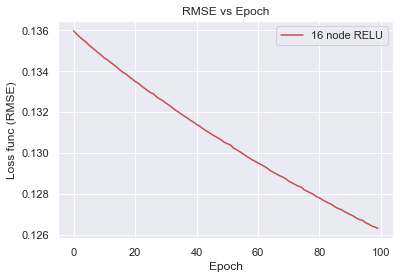

In [191]:
# plot loss vs epoch

plt.plot(np.sqrt(model2_history.history['loss']), color = 'r', label = '16 node RELU')
plt.title('RMSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss func (RMSE)')
plt.legend();


## R2 Score and loss of train and test

In [192]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

test_score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

Train loss: 0.07194136828184128
Train R2: -0.11578445513273561
Test loss: 0.0735969990491867
Test R2: -0.14162668205673867


## Model 3
- 10 layers and 100 nodes

In [193]:
# number of nodes
H = 100 

# input dimension 1 since it is just x
input_dim = 1

# instantiate a sequential model
model3 = models.Sequential()

#Layer 0
model3.add(layers.Dense(H, input_dim = input_dim, activation = 'tanh'))

# add 10 hidden layers
for i in range(10):
    model3.add(layers.Dense(H, activation = 'tanh'))

# final layer (output)
model3.add(layers.Dense(1, activation = 'linear'))

# configure the model's learning process
model3.compile(loss = 'mean_squared_error', optimizer = 'adam')

# fit the model by specifying batch size and epoch
model3_history = model3.fit(X_train, Y_train, 
                           batch_size = 256,       # number of splits 
                           epochs = 1500,          # number of iterations 
                           verbose = 0,            # to display progress
                           shuffle = True,         # shuffles the data before batching in next epoch
                           validation_split = 0.3  # loss function calculated on this
                          )


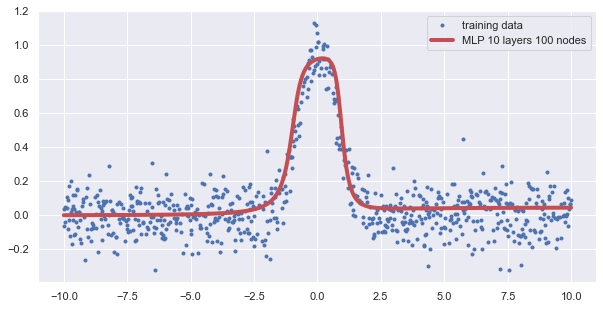

In [194]:
# predict and plot results
plt.figure(figsize = (10,5))

X_range = np.linspace(-10, 10, 1000)
y_pred = model3.predict(X_range)

plt.plot(X_train, Y_train, '.', label = 'training data')
plt.plot(X_range, y_pred, color = 'r', lw = 4, label = f'MLP 10 layers {H} nodes')
plt.legend();

## R2 and loss with model 3

In [195]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model3.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model3.predict(X_train)))

test_score = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model3.predict(X_test)))

Train loss: 0.013030157424509525
Train R2: 0.7979070115796029
Test loss: 0.01140615064650774
Test R2: 0.8230693305246404


##  Overfitting the model
## Model 4
Normally we avoid overfitting the data but here we want to so that we can regularize the model. So reduce the dataset to overfit and then regularize the model.

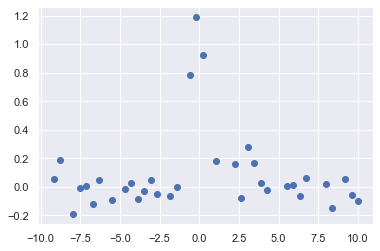

In [196]:
n_samples = 50 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

plt.scatter(X_train, Y_train);

In [197]:
# number of nodes
H = 100 

# input dimension 1 since it is just x
input_dim = 1

# instantiate a sequential model
model4 = models.Sequential()

# Layer 0
model4.add(layers.Dense(H, input_dim = input_dim, activation = 'tanh'))

# add 10 hidden layers
for i in range(10):
    model4.add(layers.Dense(H, activation = 'tanh'))

# final layer (output)
model4.add(layers.Dense(1, activation = 'linear'))

# configure the model's learning process
model4.compile(loss = 'mean_squared_error', optimizer = 'adam')

# fit the model by specifying batch size and epoch
model4_history = model4.fit(X_train, Y_train, 
                           batch_size = 256,       # number of splits 
                           epochs = 1500,          # number of iterations 
                           verbose = 0,            # to display progress
                           shuffle = True,         # shuffles the data before batching in next epoch
                           validation_split = 0.2  # loss function calculated on this
                          )



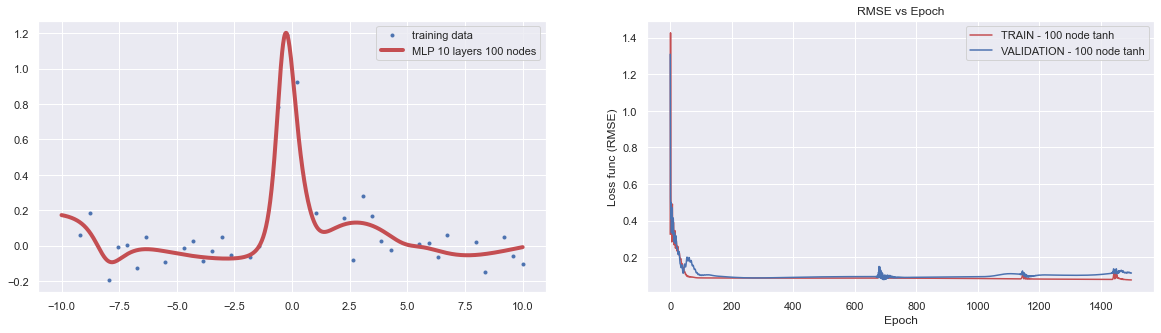

In [209]:
# predict and plot results
plt.figure(figsize = (20,5))


X_range = np.linspace(-10, 10, 1000)
y_pred = model4.predict(X_range)

plt.subplot(1,2,1)
plt.plot(X_train, Y_train, '.', label = 'training data')
plt.plot(X_range, y_pred, color = 'r', lw = 4, label = f'MLP 10 layers {H} nodes')
plt.legend();

# plot loss vs epoch
plt.subplot(1,2,2)

# loss function on training data
plt.plot(np.sqrt(model4_history.history['loss']), color = 'r', label = 'TRAIN - 100 node tanh')   

# loss function on validation data
plt.plot(np.sqrt(model4_history.history['val_loss']), color = 'b', label = 'VALIDATION - 100 node tanh')

plt.title('RMSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss func (RMSE)')
plt.legend();
